<a href="https://colab.research.google.com/github/Haritsmz/Anime_Recommendation_System/blob/main/Anime_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Packages**

In [1]:
!pip install wordcloud

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
from wordcloud import WordCloud

# Import necessary modules for content-based filtering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading Dataset**

In [4]:
# Importing anime details dataframe
df1_anime=pd.read_csv('/content/drive/MyDrive/Dataset/anime-filtered.csv')
print("Shape of the Dataset:",df1_anime.shape)
df1_anime

Shape of the Dataset: (14952, 25)


,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",...,Unknown,Unknown,NaN,13116,354,6,0,0,0,0
14948,48483,Mieruko-chan,6.51,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,...,Unknown,Unknown,NaN,17562,7010,70,14,0,14,0
14949,48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",...,Unknown,R - 17+ (violence & profanity),NaN,17558,11309,48,3,0,0,0
14950,48491,Yama no Susume: Next Summit,6.51,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,...,Unknown,PG-13 - Teens 13 or older,NaN,17565,1386,2,13,2,2,1


In [5]:
df1_anime.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'sypnopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked',
       'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped'],
      dtype='object')

In [6]:
df2_anime=pd.read_csv('/content/drive/MyDrive/Dataset/anime-dataset-2023.csv')
print("Shape of the Dataset:",df2_anime.shape)
df2_anime

Shape of the Dataset: (24905, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


# **Data Preprocessing**

In [7]:
df1_anime.rename(columns={'sypnopsis': 'Synopsis'}, inplace=True)

In [8]:
df1_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   Synopsis       13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [9]:
df1_anime.fillna(np.nan)

,anime_id,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",...,Unknown,Unknown,NaN,13116,354,6,0,0,0,0
14948,48483,Mieruko-chan,6.51,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,...,Unknown,Unknown,NaN,17562,7010,70,14,0,14,0
14949,48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",...,Unknown,R - 17+ (violence & profanity),NaN,17558,11309,48,3,0,0,0
14950,48491,Yama no Susume: Next Summit,6.51,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,...,Unknown,PG-13 - Teens 13 or older,NaN,17565,1386,2,13,2,2,1


In [10]:
df1_anime.isna().sum()

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
Synopsis         1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

In [11]:
df2_anime = df2_anime.drop_duplicates(subset='Name', keep='last')
df1_anime['Ranked'].fillna(df1_anime['Name'].map(df2_anime.set_index('Name')['Rank']), inplace=True)
df1_anime['Synopsis'].fillna(df1_anime['Name'].map(df2_anime.set_index('Name')['Synopsis']), inplace=True)

In [12]:
df1_anime.isna().sum()

anime_id           0
Name               0
Score              0
Genres             0
English name       0
Japanese name      0
Synopsis          20
Type               0
Episodes           0
Aired              0
Premiered          0
Producers          0
Licensors          0
Studios            0
Source             0
Duration           0
Rating             0
Ranked           110
Popularity         0
Members            0
Favorites          0
Watching           0
Completed          0
On-Hold            0
Dropped            0
dtype: int64

In [13]:
df1_anime_cleaned = df1_anime.fillna('Unknown')

In [14]:
df1_anime_cleaned.isna().sum()

anime_id         0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Synopsis         0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
dtype: int64

In [15]:
df1_anime_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   Synopsis       14952 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         14952 non-null  object 
 18  Popula

In [16]:
df1_anime_cleaned.duplicated().sum()

0

In [17]:
scores = df1_anime_cleaned['Score'][df1_anime_cleaned['Score'] != np.nan]
scores = scores.astype('float')
score_mean= round(scores.mean(), 2)

In [18]:
df1_anime_cleaned['Score'] = df1_anime_cleaned['Score'].replace(np.nan, score_mean)
df1_anime_cleaned['Score'] = df1_anime_cleaned['Score'].astype('float64')

In [19]:
df1_anime_cleaned['Ranked'] = pd.to_numeric(df1_anime_cleaned['Ranked'], errors='coerce')
df1_anime_cleaned['Ranked']

0           28.0
1          159.0
2          266.0
3         2481.0
4         3710.0
          ...   
14947     5816.0
14948     1982.0
14949     5201.0
14950     1307.0
14951    10137.0
Name: Ranked, Length: 14952, dtype: float64

In [20]:
df1_anime_cleaned['Genres'] = df1_anime_cleaned['Genres'].str.split(', ')

In [21]:
df1_anime_cleaned = df1_anime_cleaned[df1_anime['Name'] != 'Unknown']
print("Shape of the Dataset:",df1_anime_cleaned.shape)
df1_anime_cleaned

Shape of the Dataset: (14952, 25)


,anime_id,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"[Adventure, Mystery, Supernatural]",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",...,Unknown,Unknown,5816.0,13116,354,6,0,0,0,0
14948,48483,Mieruko-chan,6.51,"[Comedy, Horror, Supernatural]",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,...,Unknown,Unknown,1982.0,17562,7010,70,14,0,14,0
14949,48488,Higurashi no Naku Koro ni Sotsu,6.51,"[Mystery, Dementia, Horror, Psychological, Sup...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",...,Unknown,R - 17+ (violence & profanity),5201.0,17558,11309,48,3,0,0,0
14950,48491,Yama no Susume: Next Summit,6.51,"[Adventure, Slice of Life, Comedy]",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,...,Unknown,PG-13 - Teens 13 or older,1307.0,17565,1386,2,13,2,2,1


# **Exploratory Data Analysis**

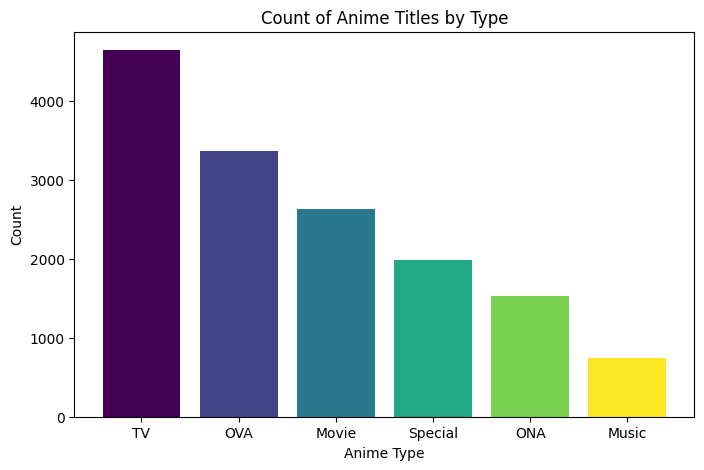

In [22]:
# Count the number of anime titles by type
type_counts = df1_anime_cleaned[df1_anime_cleaned['Type'] != 'Unknown']['Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(type_counts.index)))
plt.bar(type_counts.index, type_counts.values, color=colors)
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.title('Count of Anime Titles by Type')
plt.show()

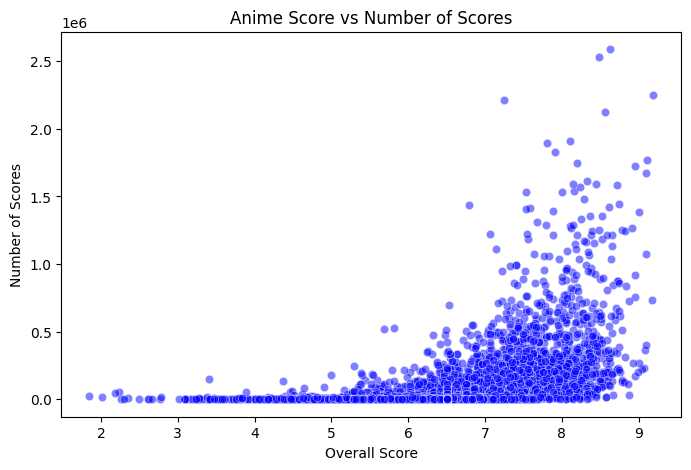

In [23]:
# Create a Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1_anime_cleaned, x='Score', y='Members', color='blue', alpha=0.5)
plt.xlabel('Overall Score')
plt.ylabel('Number of Scores')
plt.title('Anime Score vs Number of Scores')
plt.show()

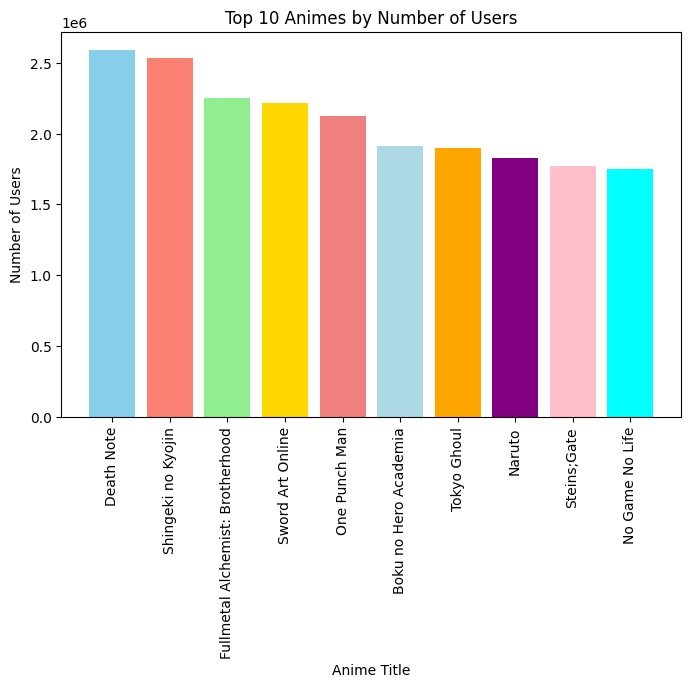

In [24]:
# Sort the DataFrame by the number of users who have scored the anime
top_10_scored = df1_anime_cleaned.sort_values(by='Members', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(8, 5))
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightblue', 'orange', 'purple', 'pink', 'cyan']
plt.bar(top_10_scored['Name'], top_10_scored['Members'], color=colors)
plt.xlabel('Anime Title')
plt.ylabel('Number of Users')
plt.title('Top 10 Animes by Number of Users')
plt.xticks(rotation=90)
plt.show()

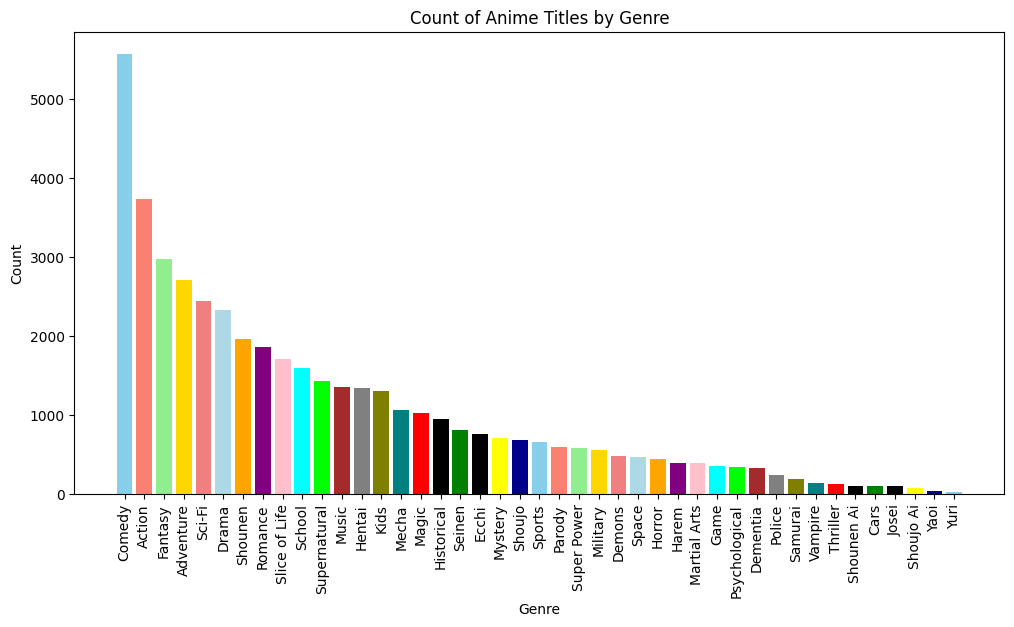

In [25]:
# Check if 'Genres' is a list and convert to string if necessary
df1_anime_cleaned['Genres'] = df1_anime_cleaned['Genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Split the genres and count their occurrences
genre_counts = df1_anime_cleaned[df1_anime_cleaned['Genres'] != "Unknown"]['Genres'].apply(lambda x: x.split(', ')).explode().value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightblue', 'orange', 'purple', 'pink', 'cyan',
          'lime', 'brown', 'gray', 'olive', 'teal', 'red', 'black', 'green', 'black', 'yellow', 'darkblue']
plt.bar(genre_counts.index, genre_counts.values, color=colors)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Anime Titles by Genre')
plt.xticks(rotation=90)
plt.show()

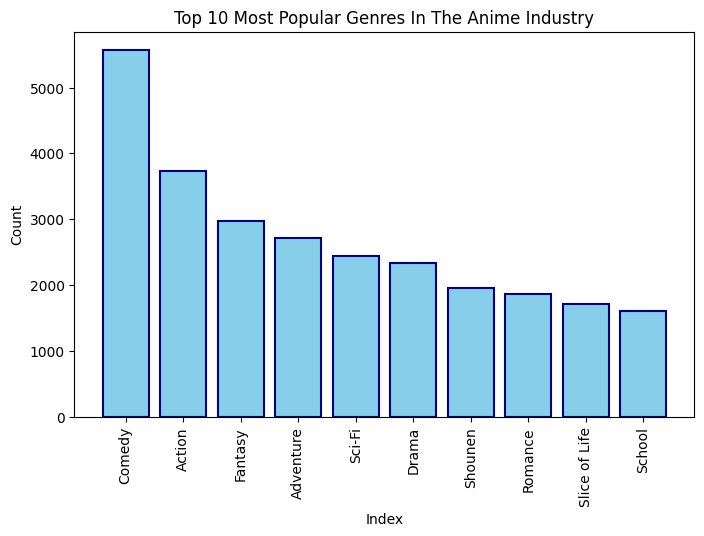

In [26]:
# Select the top 10 genres
top_10_genres = genre_counts.head(10)

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue', edgecolor='navy', linewidth=1.5)
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Genres In The Anime Industry')
plt.xticks(rotation=90)
plt.show()

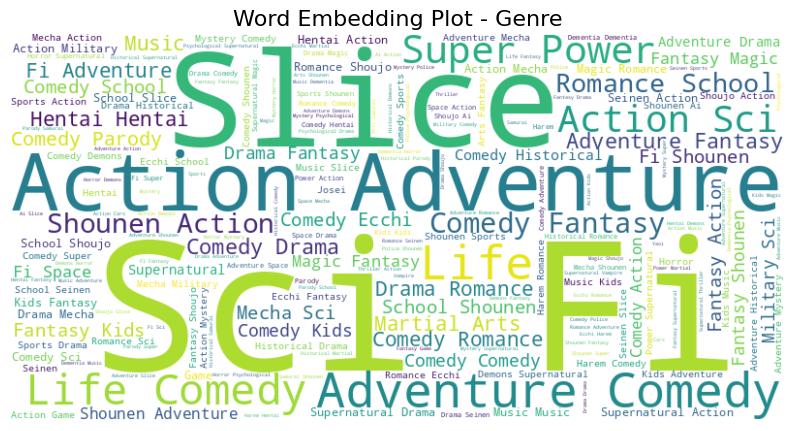

In [27]:
# Concatenate all genre values into a single string
genre_text = ' '.join(df1_anime_cleaned[df1_anime_cleaned['Genres'] != "Unknown"]['Genres'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Embedding Plot - Genre', fontsize=16)
plt.axis('off')

# Show the plot
plt.show()

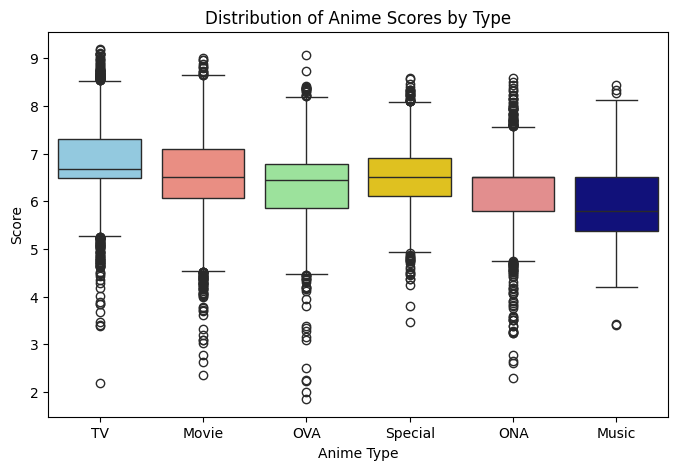

In [28]:
# Create a box plot for anime scores by type
df1_anime_cleaned_filtered = df1_anime_cleaned[df1_anime_cleaned['Type'] != 'Unknown']
plt.figure(figsize=(8, 5))
sns.boxplot(data = df1_anime_cleaned_filtered, x='Type', y='Score', palette=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'darkblue'])
plt.xlabel('Anime Type')
plt.ylabel('Score')
plt.title('Distribution of Anime Scores by Type')
plt.show()

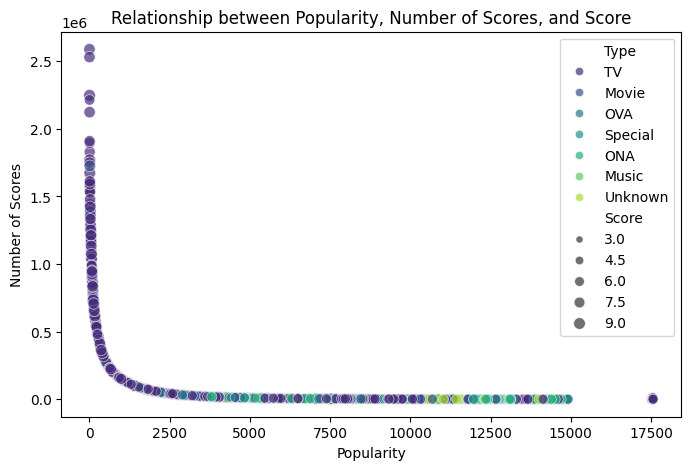

In [29]:
# Visualize the realationship between Popularity, Number of Scores, and Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df1_anime_cleaned, x='Popularity', y='Members', size='Score', hue='Type', palette='viridis', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Number of Scores')
plt.title('Relationship between Popularity, Number of Scores, and Score')
plt.legend()
plt.show()

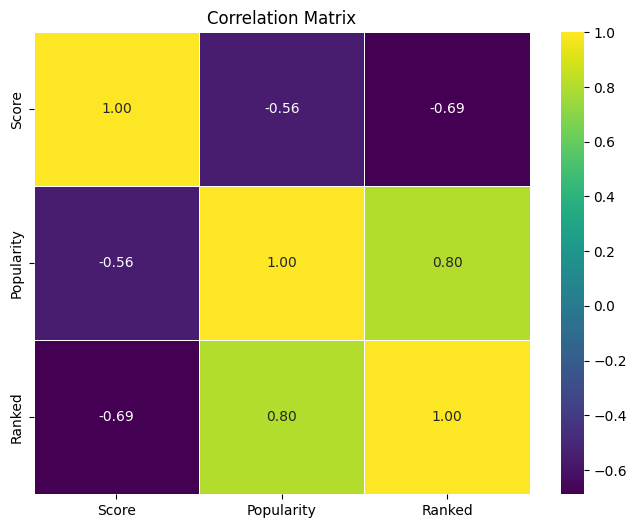

In [30]:
# Create a correlation matrix
correlation_matrix = df1_anime_cleaned[['Score', 'Popularity', 'Ranked']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

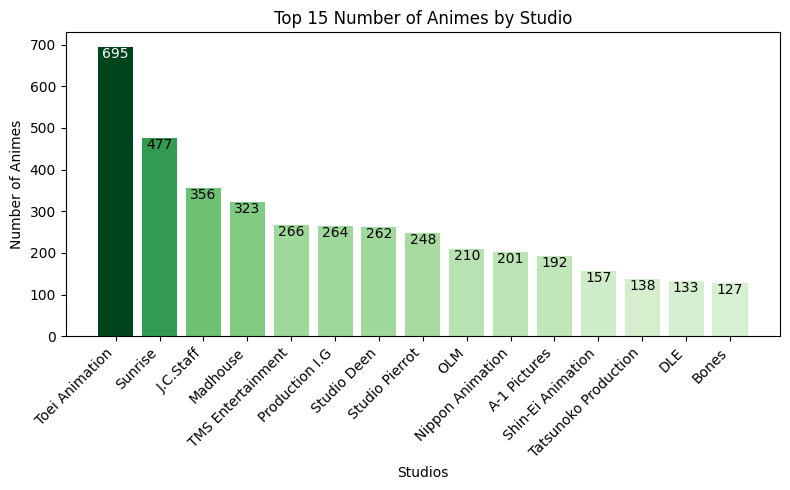

In [31]:
# Count the occurrences of each studio
studio_counts = df1_anime_cleaned['Studios'].value_counts()

# Filter the studio_counts series to exclude 'Unknown'
studio_counts = studio_counts[studio_counts.index != 'Unknown']

# Select the top 10 studios with the highest number of animes
top_studios = studio_counts.head(15)

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(top_studios.index, top_studios.values, color=plt.cm.Greens(top_studios.values / max(top_studios.values)))
plt.xlabel('Studios')
plt.ylabel('Number of Animes')
plt.title('Top 15 Number of Animes by Studio')

# Add text on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    text_color = 'white' if i == 0 else 'black'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='top', color=text_color)

plt.xticks(rotation=45, ha='right')  # Optional: rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

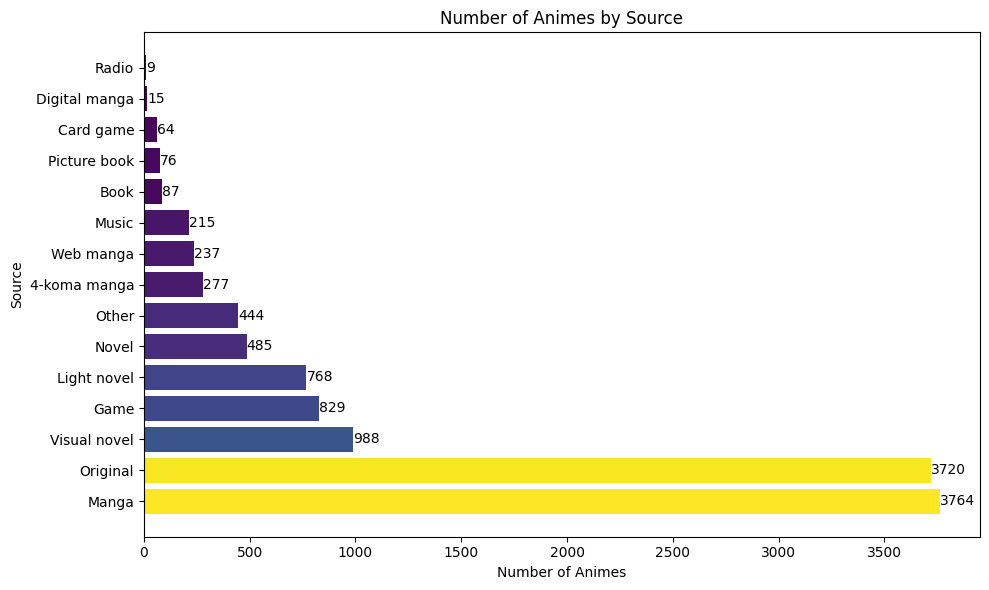

In [32]:
# Count the occurrences of each source
source_counts = df1_anime_cleaned['Source'].value_counts()

# Filter the source_counts series to exclude 'Unknown'
source_counts = source_counts[source_counts.index != 'Unknown']

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(source_counts.index, source_counts.values, color=plt.cm.viridis(source_counts.values / max(source_counts.values)))
plt.xlabel('Number of Animes')
plt.ylabel('Source')
plt.title('Number of Animes by Source')

# Add text beside each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')

plt.tight_layout()
plt.show()

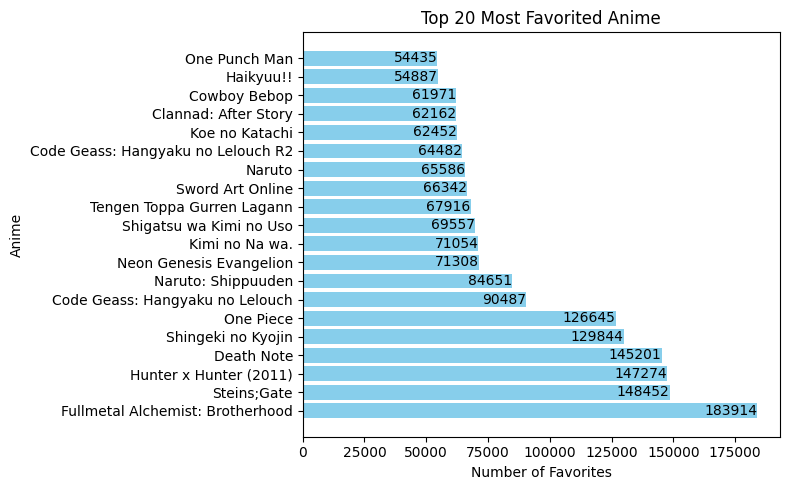

In [33]:
# Sort the DataFrame by the 'Favorites' column in descending order
sorted_df = df1_anime_cleaned.sort_values('Favorites', ascending=False)

# Select the top 20 most favorited anime
top_favorites = sorted_df.head(20)

# Create the horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(top_favorites['Name'], top_favorites['Favorites'], color='skyblue')
plt.xlabel('Number of Favorites')
plt.ylabel('Anime')
plt.title('Top 20 Most Favorited Anime')

# Add text beside each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', ha='right')

plt.tight_layout()
plt.show()

# **Model Training (Content Based Filtering)**

In [34]:
cv = CountVectorizer(stop_words='english')

In [35]:
df1_anime_cleaned['Synopsis'].fillna('', inplace=True)
data = cv.fit_transform(df1_anime_cleaned['Synopsis']).toarray()
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
similarity = linear_kernel(data)
similarity

array([[111.,  20.,   3., ...,   0.,   1.,   6.],
       [ 20.,  84.,   6., ...,   0.,   0.,   2.],
       [  3.,   6., 111., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   4.,   1.],
       [  6.,   2.,   0., ...,   0.,   1.,  42.]])

In [37]:
def anime_recommend(anime):
    # Check if the anime is in the DataFrame
    if anime not in df1_anime_cleaned['Name'].values:
        print(f"Anime '{anime}' not found in the DataFrame.")
        return None
    index = df1_anime_cleaned[df1_anime_cleaned['Name']==anime].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    anime_recommendations = []
    for i in distances[1:11]:
        anime_recommendations.append(df1_anime.iloc[i[0]])

    # Create a new DataFrame with recommended anime
    recommended_df = pd.DataFrame(anime_recommendations)[['Name', 'Score', 'Genres', 'Type', 'Ranked', 'Studios']]

    return recommended_df

In [38]:
anime_recommend('Fullmetal Alchemist: Brotherhood')

,Name,Score,Genres,Type,Ranked,Studios
100,Fullmetal Alchemist,8.17,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,337.0,Bones
5645,Fullmetal Alchemist: The Sacred Star of Milos,7.32,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",Movie,2242.0,Bones
403,Fullmetal Alchemist: The Conqueror of Shamballa,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",Movie,1361.0,Bones
4588,Fullmetal Alchemist: Brotherhood Specials,8.03,"Military, Adventure, Drama, Magic, Fantasy, Sh...",Special,508.0,Bones
6388,Fullmetal Alchemist: The Sacred Star of Milos ...,6.97,"Comedy, Magic, Fantasy",ONA,3740.0,Bones
3812,Yamato Takeru,6.78,"Action, Adventure, Fantasy, Magic, Mecha, Sci-...",TV,4557.0,Nippon Animation
2584,Yadamon,6.15,"Adventure, Comedy, Fantasy",TV,7593.0,Unknown
11658,Jikan no Shihaisha,6.33,"Supernatural, Shounen",TV,6738.0,Project No.9
12327,One Piece: Episode of East Blue - Luffy to 4-n...,7.91,"Action, Adventure, Comedy, Super Power, Drama,...",Special,661.0,Toei Animation
2399,Mirai Shounen Conan 2: Taiga Daibouken,6.52,"Adventure, Drama, Sci-Fi",TV,5795.0,Nippon Animation


In [39]:
anime_recommend('Dr. Stone')

,Name,Score,Genres,Type,Ranked,Studios
14252,Dr. Stone: Stone Wars,8.29,"Sci-Fi, Adventure, Shounen",TV,229.0,TMS Entertainment
13072,Godzilla 3: Hoshi wo Kuu Mono,6.27,"Action, Adventure, Sci-Fi",Movie,7048.0,Polygon Pictures
2502,MapleStory,5.33,"Action, Kids, Fantasy, Comedy, Romance",TV,10090.0,Madhouse
2584,Yadamon,6.15,"Adventure, Comedy, Fantasy",TV,7593.0,Unknown
6402,Ghost Messenger,6.51,"Action, Supernatural",OVA,14114.0,Studio Animal
11939,18if,6.17,"Mystery, Supernatural",TV,7490.0,Gonzo
12582,Godzilla 2: Kessen Kidou Zoushoku Toshi,6.68,"Action, Adventure, Sci-Fi",Movie,5007.0,Polygon Pictures
1391,Ai Tenshi Densetsu Wedding Peach,6.69,"Adventure, Magic, Comedy, Romance, Shoujo",TV,4946.0,OLM
3812,Yamato Takeru,6.78,"Action, Adventure, Fantasy, Magic, Mecha, Sci-...",TV,4557.0,Nippon Animation
11498,Kamisama Minarai: Himitsu no Cocotama Movie - ...,6.51,"Kids, Magic, Fantasy",Movie,14835.0,OLM


In [40]:
pickle.dump(df1_anime_cleaned,open("anime_recommend.pkl","wb"))
pickle.dump(similarity,open("similarity.pkl","wb"))

In [41]:
np.array(df1_anime_cleaned["Name"])

array(['Cowboy Bebop', 'Cowboy Bebop: Tengoku no Tobira', 'Trigun', ...,
       'Higurashi no Naku Koro ni Sotsu', 'Yama no Susume: Next Summit',
       'Scarlet Nexus'], dtype=object)

In [42]:
!pip install bz2file

  Preparing metadata (setup.py) ... done
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6869 sha256=32cfa8c6e4a585009760d0ea84d93f15056a9fb79b938b19b5b1a8c58c2fc07f
  Stored in directory: /root/.cache/pip/wheels/69/ee/f7/6fccd10cb65421ba2da64fa6caf8ee7fbae0059884af8c8587
Successfully built bz2file


In [43]:
import bz2file as bz2

# Load similarity model from the "similarity.pkl" file
similarity = pickle.load(open("similarity.pkl", "rb"))

def compressed_pickle(file_name, data):
    with bz2.BZ2File(file_name + '.pbz2', 'w') as f:
        pickle.dump(data, f)

# Save the similarity model using compressed_pickle
compressed_pickle('similarity', similarity)